In [70]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from tifffile import imread
from numpy import fft
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [71]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/'
y = imread('/Users/aimachine/Documents/JLMCurvature/FullReslution.tif')

525   242


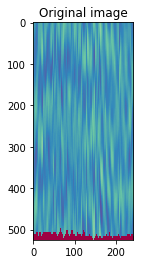

In [72]:
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')
Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)

In [73]:
# Show the results

def plot_spectrum(ffty):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(ffty, norm=LogNorm(vmin=10))
    plt.colorbar()

In [92]:


ffty = fft.fft(y,2)
freq = np.fft.fftfreq(ffty.shape[-1])
FFTback= ffty * ffty.conjugate()
print(FFTback)


[[0.00250835+0.j 0.00250835+0.j]
 [0.00250723+0.j 0.00250723+0.j]
 [0.00250617+0.j 0.00250617+0.j]
 ...
 [0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j]]


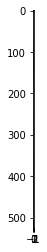

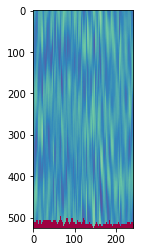

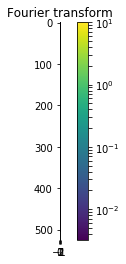

In [93]:


plt.imshow(FFTback.real, plt.cm.Spectral)
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.figure()
plt.title('Fourier transform')
plot_spectrum(FFTback.real)


axes = 'XY'
save_tiff_imagej_compatible((targetdir + 'FFTResult.tif') , FFTback.real, axes)



/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


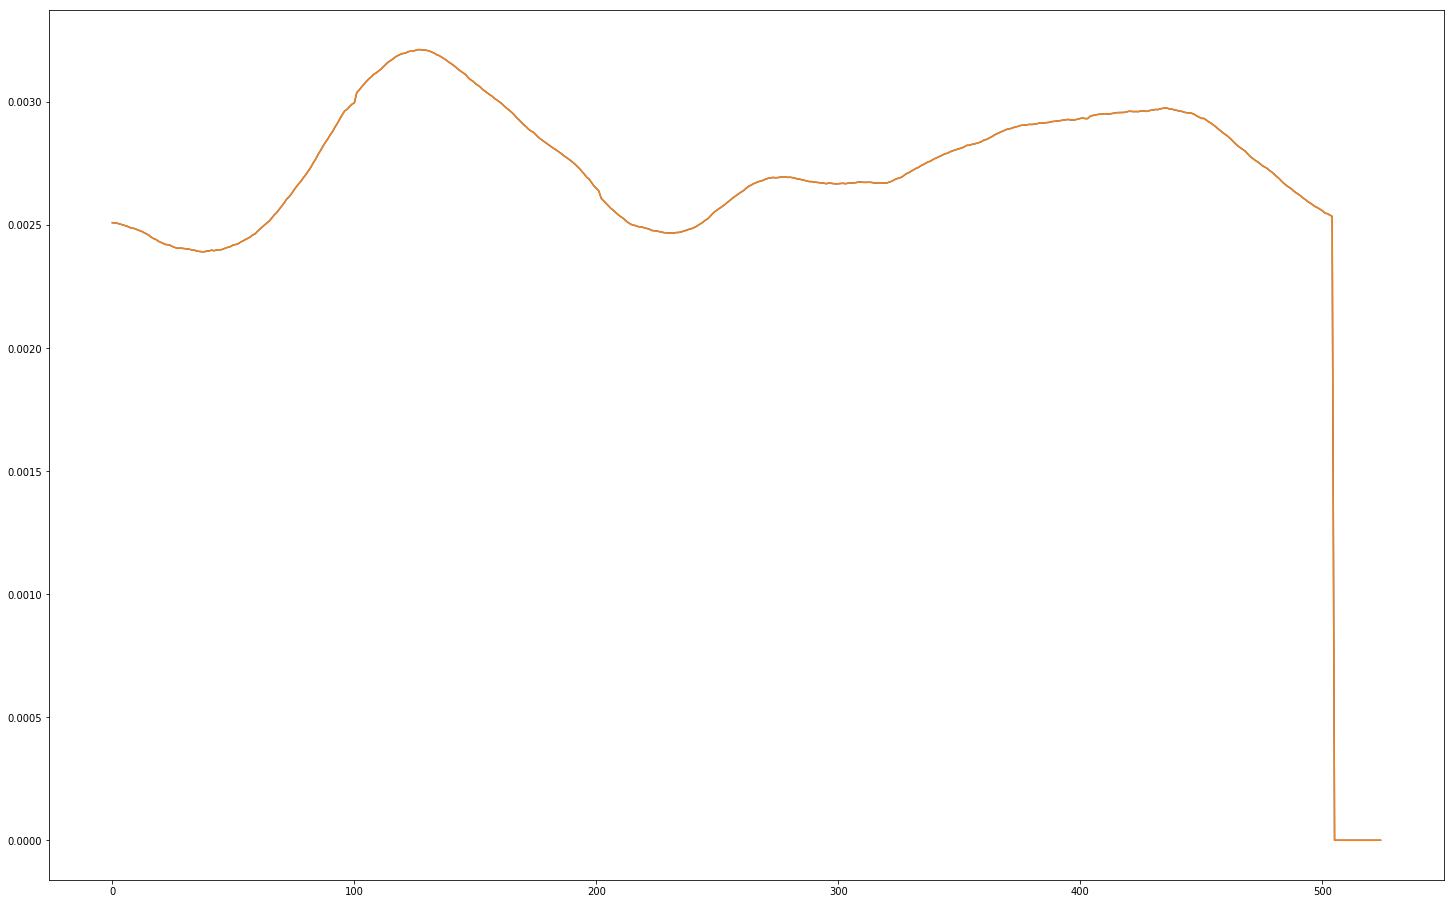

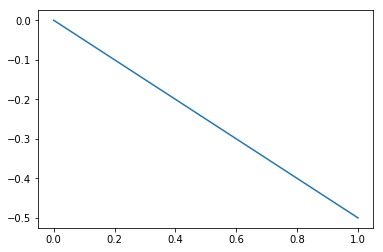

In [94]:
row = 1
column = 1
fig, axs = plt.subplots(row, column, figsize=(25, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.1)



plt.plot(FFTback) 
plt.figure()
plt.plot(freq)
